### Dataset pre-processing

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

dataset = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset_c = dataset.dropna()
dataset_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


# 4. Based on global unit sales, who are the top 5 game publishers?

In [21]:
# sort by Global_Sales and show top 5 Publishers

# gives total global sales by publisher - otherwise gives sum of whole column
total_sales = dataset_c['Global_Sales'].groupby(dataset_c['Publisher']).transform('sum')

# create new dataframe of only publisher and total global sales
sales_vs_publisher = pd.DataFrame({
    'Total_Global_Sales': total_sales,
    'Publisher': dataset_c['Publisher']
})

# drop duplicates created by the summing - it creates one row for each row we had in initial dataset
sales_vs_publisher = sales_vs_publisher.drop_duplicates()

# sort in descending order by total global sales
sales_vs_publisher = sales_vs_publisher.sort_values(by=['Total_Global_Sales'], ascending=False)

# top 5 rows
sales_vs_publisher.head()

,Total_Global_Sales,Publisher
77,868.55,Electronic Arts
0,849.49,Nintendo
29,535.74,Activision
28,388.10,Sony Computer Entertainment
16,350.17,Take-Two Interactive


Based on global unit sales, the top 5 game publishers are Electronic Arts, Nintendo, Activision, Sony Computer Entertainment, and Take-Two Interactive.

In [18]:
dataset_c['Global_Sales'].groupby(dataset_c['Publisher']).sum()

Publisher
10TACLE Studios          0.02
1C Company               0.06
2D Boy                   0.04
3DO                      2.48
505 Games               31.71
                        ...  
Zoo Games                1.34
Zushi Games              0.21
bitComposer Games        0.06
id Software              0.03
inXile Entertainment     0.10
Name: Global_Sales, Length: 262, dtype: float64

# 5.	Based on global unit sales, who were the top 5 game publishers in 1995?

In [54]:
# select total global sales, publisher from dataset where Year_of_Release = 1995

# can't use the cleaned dataset here because there are no instances of 1995 games without any null values (some not released in other regions etc)
# selects only entries with year 1995
dataset_95 = dataset[dataset['Year_of_Release'] == 1995]

total_sales_95 = dataset_95['Global_Sales'].groupby(dataset['Publisher']).transform('sum')
sales_vs_publisher_95 = pd.DataFrame({
    'Total_Global_Sales': total_sales_95,
    'Publisher': dataset_95['Publisher']
})

sales_vs_publisher_95 = sales_vs_publisher_95.drop_duplicates()

sales_vs_publisher_95 = sales_vs_publisher_95.sort_values(by='Total_Global_Sales', ascending=False)
sales_vs_publisher.head()

,Total_Global_Sales,Publisher
77,868.55,Electronic Arts
0,849.49,Nintendo
29,535.74,Activision
28,388.10,Sony Computer Entertainment
16,350.17,Take-Two Interactive


# 6.	Show global annual unit sales by year for “Electronic Arts”, “Nintendo” and “Sony Computer Entertainment” between 1990 and 2015

<AxesSubplot:xlabel='Year_of_Release'>

<Figure size 432x288 with 0 Axes>

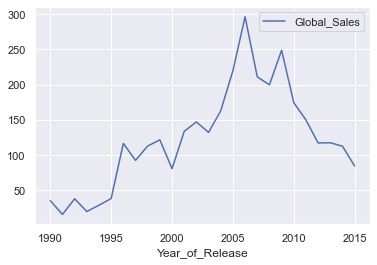

In [89]:
publisher_list = ['Electronic Arts', 'Nintendo', 'Sony Computer Entertainment']

# select total global sales, year from dataset where publisher is "EA", "nintendo" or "sony" and year between 1990 and 2015
filtered_sales = dataset['Global_Sales'][(dataset['Year_of_Release'].between(1990,2015)) & (dataset['Publisher'].isin(publisher_list))]
dataset_q6 = pd.DataFrame({
    "Global_Sales": filtered_sales,
    "Publisher": dataset['Publisher'].isin(publisher_list),
    "Year_of_Release": dataset['Year_of_Release'][dataset['Year_of_Release'].between(1990,2015)]
})
# using pivot tables
q6_pivot = dataset_q6.pivot_table(index="Year_of_Release", values=["Global_Sales"], aggfunc={"Global_Sales": np.sum})

plt.figure()
q6_pivot.plot()

In [72]:
publisher_list = ['Electronic Arts', 'Nintendo', 'Sony Computer Entertainment']

dataset['Global_Sales'][dataset['Publisher'].isin(publisher_list)]


0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16612     0.01
16656     0.01
16657     0.01
16670     0.01
16683     0.01
Name: Global_Sales, Length: 2749, dtype: float64

##    a.	Which year saw the most unit sales for Nintendo?

## b.	When did Electronic Arts start generating more annual global unit sales than Sony?

# 7.	If you were a designer writing a new game in 2005, what genre and platform would you choose? Explain why?

#     8.	Stretch Question (you do not have to complete this question, but we will be interested in your opinion if you are able to work on this research)
## Based on historical unit sales of games for Sony PlayStation, PlayStation 2, PlayStation 3 & PlayStation 4 what do you expect to see over the next few years for games growth and decline for PlayStation 5?